## imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2022-09-26 20:01:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1,36M  2,32MB/s    in 0,6s    

2022-09-26 20:01:29 (2,32 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



## data preparation

In [72]:
columns_hw3 = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
cat_column_names = list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
for c in cat_column_names:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
df = df.fillna(0)

In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [15]:
df['rooms_per_household']  = df['total_rooms'] / df['households']
df['bedrooms_per_room']  = df['total_bedrooms'] / df['total_rooms']
df['population_per_household']  = df['population'] / df['households']

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467


## questions

### Q1 
What is the most frequent observation (mode) for the column ocean_proximity?

In [17]:
df['ocean_proximity'].describe()

count         20640
unique            5
top       <1h_ocean
freq           9136
Name: ocean_proximity, dtype: object

In [18]:
df2 = df.groupby(['ocean_proximity'])['ocean_proximity'].count()
df2

ocean_proximity
<1h_ocean     9136
inland        6551
island           5
near_bay      2290
near_ocean    2658
Name: ocean_proximity, dtype: int64

### Q2

Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?


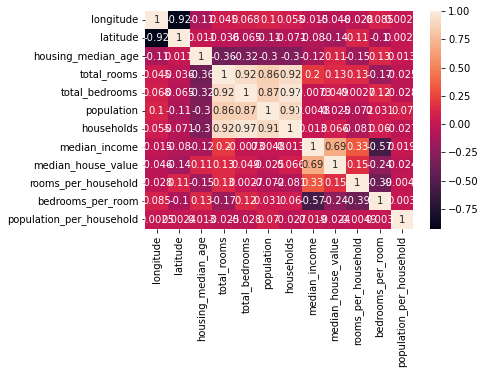

In [19]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [20]:
max(corrMatrix)

'total_rooms'

In [21]:
corrMatrix[corrMatrix > 0.95]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,NaN,1.000000,NaN,0.966507,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,NaN,0.966507,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
rooms_per_household,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [22]:
df['median_house_value'].mean()

206855.81690891474

In [23]:
df['above_average'] = (df['median_house_value'] > df['median_house_value'].mean()).astype(int)

In [24]:
df['above_average'].describe()

count    20640.000000
mean         0.406250
std          0.491144
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: above_average, dtype: float64

In [25]:
df['above_average'].sum()

8385

## Setting up the validation framework

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [28]:
df_full_train.shape, df_test.shape

((16512, 14), (4128, 14))

In [29]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [30]:
df_train.shape, df_val.shape, df_test.shape

((12384, 14), (4128, 14), (4128, 14))

In [31]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [32]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [33]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [34]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Q3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)


In [35]:
from sklearn.metrics import mutual_info_score

In [36]:
score = mutual_info_score(df_full_train.ocean_proximity, df_full_train.above_average)
round(score, 2)

0.1

## Q4


- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
-- model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [37]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
dicts = df_train.to_dict(orient='records')

In [39]:
dicts

[{'longitude': -118.18,
  'latitude': 34.63,
  'housing_median_age': 19.0,
  'total_rooms': 3562.0,
  'total_bedrooms': 606.0,
  'population': 1677.0,
  'households': 578.0,
  'median_income': 4.1573,
  'ocean_proximity': 'inland',
  'rooms_per_household': 6.162629757785467,
  'bedrooms_per_room': 0.17012914093206064,
  'population_per_household': 2.9013840830449826},
 {'longitude': -116.9,
  'latitude': 34.69,
  'housing_median_age': 10.0,
  'total_rooms': 337.0,
  'total_bedrooms': 102.0,
  'population': 108.0,
  'households': 50.0,
  'median_income': 0.4999,
  'ocean_proximity': 'inland',
  'rooms_per_household': 6.74,
  'bedrooms_per_room': 0.3026706231454006,
  'population_per_household': 2.16},
 {'longitude': -118.26,
  'latitude': 33.78,
  'housing_median_age': 27.0,
  'total_rooms': 1672.0,
  'total_bedrooms': 491.0,
  'population': 1723.0,
  'households': 462.0,
  'median_income': 2.0458,
  'ocean_proximity': 'near_ocean',
  'rooms_per_household': 3.619047619047619,
  'bedroom

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [42]:
dv.transform(dicts)[0]

array([ 1.70129141e-01,  5.78000000e+02,  1.90000000e+01,  3.46300000e+01,
       -1.18180000e+02,  4.15730000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.67700000e+03,
        2.90138408e+00,  6.16262976e+00,  6.06000000e+02,  3.56200000e+03])

In [43]:
dv.get_feature_names()

/home/sergey/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1h_ocean',
 'ocean_proximity=inland',
 'ocean_proximity=island',
 'ocean_proximity=near_bay',
 'ocean_proximity=near_ocean',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [44]:
train_dicts = df_train.to_dict(orient='records')

In [45]:
X_train = dv.fit_transform(train_dicts)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [48]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [50]:
w0 = model.intercept_[0]
w0

-0.2363446949985733

In [51]:
w = model.coef_[0]
w.round(3)

array([ 0.818,  0.006,  0.038,  0.141,  0.097,  1.245,  0.432, -1.876,
        0.163,  0.141,  0.903, -0.002,  0.004,  0.013,  0.   , -0.   ])

In [162]:
dict(zip(dv.get_feature_names_out(), w.round(6)))

{'above_average': 0.817823,
 'bedrooms_per_room': 0.00552,
 'households': 0.037697,
 'housing_median_age': 0.141373,
 'latitude': 0.096958,
 'log_median_house_value': 1.245067,
 'longitude': 0.432304,
 'median_income': -1.876453,
 'ocean_proximity=<1h_ocean': 0.1632,
 'ocean_proximity=inland': 0.141321,
 'ocean_proximity=island': 0.903284,
 'ocean_proximity=near_bay': -0.001722,
 'ocean_proximity=near_ocean': 0.004295,
 'population': 0.012787,
 'population_per_household': 0.000272,
 'rooms_per_household': -6.8e-05}

In [55]:
dict_val = df_val.to_dict(orient='records')

In [56]:
X_val = dv.transform(dict_val)

In [57]:
y_val_pred = model.predict_proba(X_val)[:,1]

In [58]:
score = (y_val_pred >= 0.5)

In [95]:
original_score = (score == y_val).mean()
original_score

0.8219476744186046

In [60]:
y_val_pred

array([0.99471674, 0.99951912, 0.02070766, ..., 0.93571163, 0.77470981,
       0.628024  ])

## Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
-- Which of following feature has the smallest difference?
--- total_rooms
--- total_bedrooms
--- population
--- households


In [131]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [135]:
columns_q5 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
original_score = 0.8241279069767442

In [143]:
exlude_col = 'households'
df_train_2 = df_train[columns_q5].copy()
df_val_2 = df_val[columns_q5].copy()
if exlude_col:
    del df_train_2[exlude_col]
    del df_val_2[exlude_col]

In [144]:

dicts_2 = df_train_2.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts_2)
dv.transform(dicts_2)[0]

train_dicts_2 = df_train_2.to_dict(orient='records')
X_train_2 = dv.fit_transform(train_dicts_2)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_2, y_train)

dict_val_2 = df_val_2.to_dict(orient='records')
X_val_2 = dv.transform(dict_val_2)
y_val_pred = model.predict_proba(X_val_2)[:,1]
score = (y_val_pred >= 0.5)
original_score - (score == y_val).mean()

0.006298449612403112

In [ ]:
#--- total_rooms :    0.0021802325581395943
#--- total_bedrooms : 0.0021802325581395943
#--- population       0.01017441860465118
#--- households       0.006298449612403112

In [146]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1h_ocean',
       'ocean_proximity=inland', 'ocean_proximity=island',
       'ocean_proximity=near_bay', 'ocean_proximity=near_ocean',
       'population', 'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

## Q6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


In [149]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_full_train.shape, df_test.shape

df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)
df_train.shape, df_val.shape, df_test.shape

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train['log_median_house_value'] = np.log1p(df_train['median_house_value'])
df_val['log_median_house_value'] = np.log1p(df_val['median_house_value'])
df_test['log_median_house_value'] = np.log1p(df_test['median_house_value'])

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [153]:
from sklearn.linear_model import Ridge

In [161]:
dicts_6 = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts_6)
dv.transform(dicts_6)[0]

train_dicts_6 = df_train.to_dict(orient='records')
X_train_6 = dv.fit_transform(train_dicts_6)

dict_val_6 = df_val.to_dict(orient='records')
X_val_6 = dv.transform(dict_val_6)


for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train_6, y_train)

    y_val_pred = model.predict(X_val_6)
    score = (y_val_pred >= 0.5)
    
    print(a, np.sqrt(((score - y_val_pred) ** 2).mean()))


0 0.3899372532380289
0.01 0.3899372532471561
0.1 0.38993725333388635
1 0.3899372542057387
10 0.3899372629105587
